### Lab3 - 2 - Data Transformations

In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

When preparing data for input to machine learning algorithms you may have to perform certain types of data preparation.

In most enterprise solutions all or most of these tasks are automated for you, but in many languages they aren’t. The enterprise solutions are about ‘automating the boring stuff’ so that you don’t have to worry about it and waste valuable time doing boring, repetitive things.

The following examples illustrates a number of ways to record categorical variables into numeric. There are a number of approaches available, and it is up to you to decide which one might work best for your problem, your data, etc.

Let’s begin by loading the data set to be used in these examples. It is a Video Games reviews data set.
Useful : This website has a list of useful and typical data transformations. Some of these are covered below.
https://www.kdnuggets.com/2020/07/easy-guide-data-preprocessing-python.html

In [ ]:
# perform some Statistics on the items in a panda
import pandas as pd
import numpy as np
import matplotlib as plt
videoReview = pd.read_csv('Video_Games_Sales_as_at_22_Dec_2016.csv') 
videoReview.head(10)

FileNotFoundError: [Errno 2] No such file or directory: '/Users/brendan.tierney/Dropbox/4-Datasets/Video_Games_Sales_as_at_22_Dec_2016.csv'

In [14]:
#What are the data types of each variable
videoReview.dtypes

Name                object
Platform            object
Year_of_Release    float64
Genre               object
Publisher           object
NA_Sales           float64
EU_Sales           float64
JP_Sales           float64
Other_Sales        float64
Global_Sales       float64
Critic_Score       float64
Critic_Count       float64
User_Score          object
User_Count         float64
Developer           object
Rating              object
dtype: object

In [15]:
df=videoReview
df['Developer'].unique().tolist()

['Nintendo',
 nan,
 'Good Science Studio',
 'Rockstar North',
 'Polyphony Digital',
 'Infinity Ward, Sledgehammer Games',
 'Treyarch',
 'Infinity Ward',
 'DMA Design',
 'Game Arts',
 'Retro Studios, Entertainment Analysis & Development Division',
 'Bungie Software, Bungie',
 'Ubisoft',
 'Bungie',
 'SquareSoft',
 '343 Industries',
 'Hudson Soft',
 'Bethesda Game Studios',
 'EA Sports',
 'Bungie Software',
 'Nd Cube',
 'Hudson',
 'Electronic Arts',
 'The Sims Studio',
 'Game Freak',
 'Rockstar Leeds',
 'Sledgehammer Games',
 'EA Sports, EA Vancouver',
 'Nintendo EAD Tokyo',
 'EA DICE',
 'EA Black Box',
 'Ubisoft Paris',
 'Namco',
 'Naughty Dog',
 'HAL Labs',
 'EA Canada',
 'EA LA',
 'Epic Games',
 'Pipeworks Software, Inc.',
 'Rockstar San Diego',
 'Retro Studios',
 'Blizzard Entertainment',
 'Reflections Interactive',
 'Rare Ltd.',
 'KCEJ',
 'Kojima Productions',
 'Square Enix',
 'SCE/WWS, Media Molecule',
 'Capcom',
 'Level 5',
 "Traveller's Tales",
 'Taito Corporation',
 'Ubisoft Mont

In [16]:
#We don’t want to work with all the data in these examples. 
#We just want to concentrate on the categorical variables. 
#Let’s us create a subset of the dataframe to contains these.
df = videoReview.select_dtypes(include=['object']).copy()
print(df.shape)
df.head(10)


(16719, 7)


,Name,Platform,Genre,Publisher,User_Score,Developer,Rating
0,Wii Sports,Wii,Sports,Nintendo,8,Nintendo,E
1,Super Mario Bros.,NES,Platform,Nintendo,NaN,NaN,NaN
2,Mario Kart Wii,Wii,Racing,Nintendo,8.3,Nintendo,E
3,Wii Sports Resort,Wii,Sports,Nintendo,8,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,Role-Playing,Nintendo,NaN,NaN,NaN
5,Tetris,GB,Puzzle,Nintendo,NaN,NaN,NaN
6,New Super Mario Bros.,DS,Platform,Nintendo,8.5,Nintendo,E
7,Wii Play,Wii,Misc,Nintendo,6.6,Nintendo,E
8,New Super Mario Bros. Wii,Wii,Platform,Nintendo,8.4,Nintendo,E
9,Duck Hunt,NES,Shooter,Nintendo,NaN,NaN,NaN


In [17]:
#Now do a little data clean up by removing NaN (nulls)
df.dropna(inplace=True)
df.isnull().sum()
#NB: Before removing NaN records you could clean the data and replace these with other values

Name          0
Platform      0
Genre         0
Publisher     0
User_Score    0
Developer     0
Rating        0
dtype: int64

In [18]:
print(df.shape)
#Our data set has been reduced by approx 7,000 records!

(9873, 7)


In [19]:
#Question: After running all of this code, modify the above to do better replacement of NaN 
#          and see what impact that has.

In [20]:
#Output some summary statistics for the data
df.describe()

,Name,Platform,Genre,Publisher,User_Score,Developer,Rating
count,9873,9873,9873,9873,9873,9873,9873
unique,6020,17,12,329,96,1656,8
top,Madden NFL 07,PS2,Action,Electronic Arts,tbd,Ubisoft,E
freq,9,1478,2177,1137,2374,204,3949


In [21]:
#transpose it to display differently
df.describe().transpose()

,count,unique,top,freq
Name,9873,6020,Madden NFL 07,9
Platform,9873,17,PS2,1478
Genre,9873,12,Action,2177
Publisher,9873,329,Electronic Arts,1137
User_Score,9873,96,tbd,2374
Developer,9873,1656,Ubisoft,204
Rating,9873,8,E,3949


<Axes: xlabel='Platform', ylabel='count'>

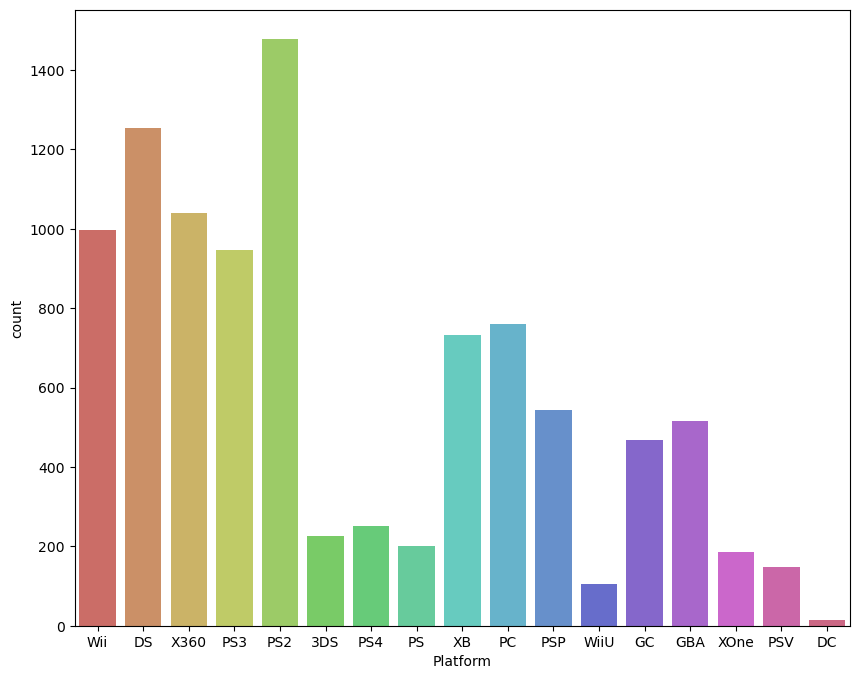

In [22]:
#The above table shows the number of unique values in each of the variables. 
#We will use Platform, Genre and Rating for the variable example below.
#Let's chart these variables.

#check the number of occurances for each variable 
import seaborn as sb
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = 10, 8

sb.countplot(x='Platform',data=df, palette='hls')

<Axes: xlabel='Genre', ylabel='count'>

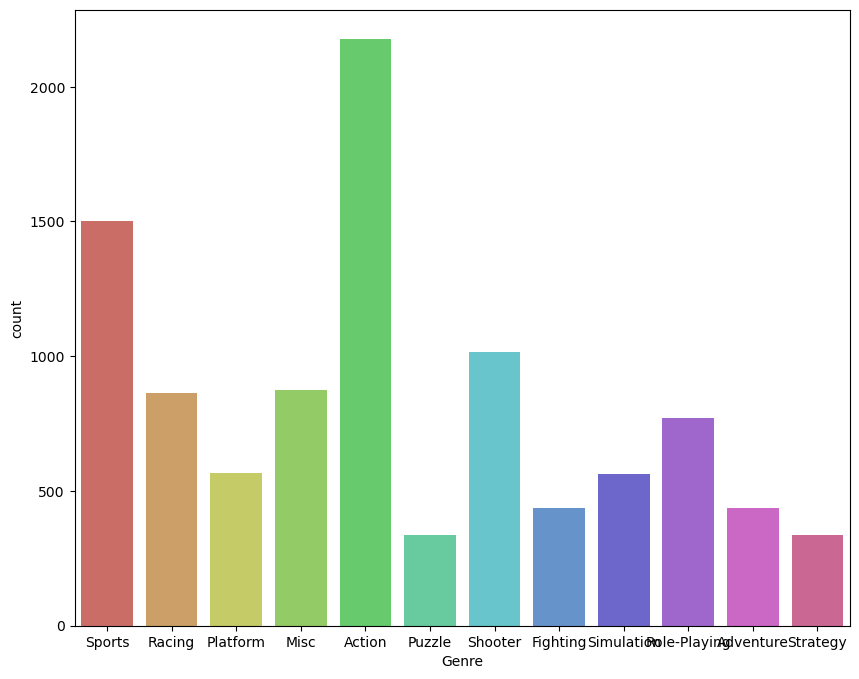

In [23]:
#Now plot for Genre
sb.countplot(x='Genre',data=df, palette='hls')	


<Axes: xlabel='Rating', ylabel='count'>

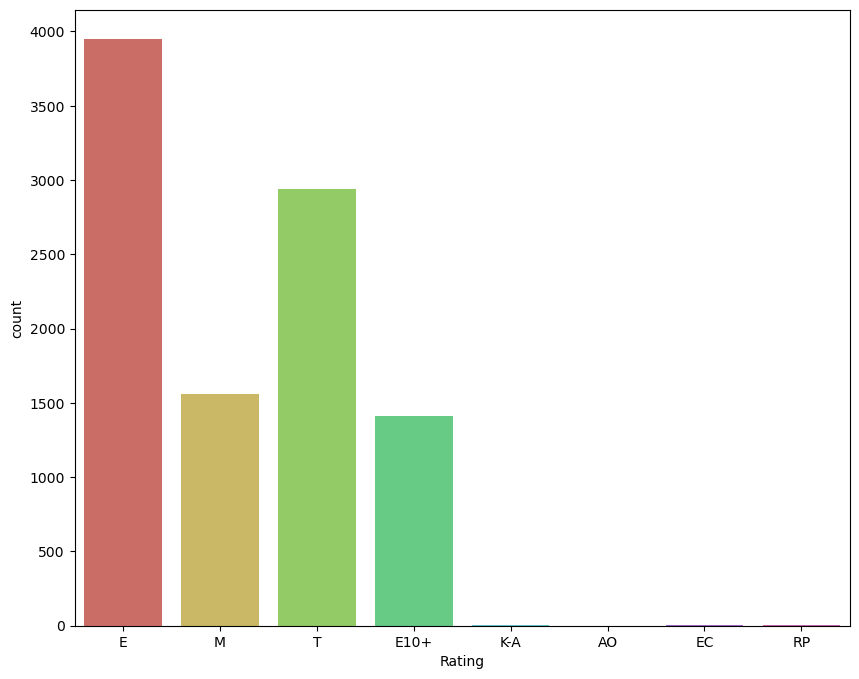

In [24]:
#Now for Rating
sb.countplot(x='Rating',data=df, palette='hls')


### 1-One-hot Coding


In [25]:
#The first approach is to use the commonly used one-hot coding method. 
#This will take a categorical variable and create a set of new variables corresponding 
#with each distinct value in the variable, and then populate it with a binary value to 
#indicate the original value.

#apply one-hot-coding to all the categorical variables
# and create a new dataframe to store the results

df2 = pd.get_dummies(df)
df2.head(20)

,Name_ Tales of Xillia 2,Name_.hack//Infection Part 1,Name_.hack//Mutation Part 2,Name_.hack//Outbreak Part 3,Name_007 Racing,Name_007: Quantum of Solace,Name_007: The World is not Enough,Name_1 vs. 100,Name_10 Minute Solution,Name_100 All-Time Favorites,...,Developer_syn Sophia,Developer_zSlide,Rating_AO,Rating_E,Rating_E10+,Rating_EC,Rating_K-A,Rating_M,Rating_RP,Rating_T
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
11,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
13,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
14,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
15,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [26]:
df2.shape

(9873, 8138)

As you can see we now have 8138 variables in the pandas dataframe!
That is a lot and may not be workable for you. You may need to look at some feature reduction methods to reduce the number of variables.

### 2-Find and Replace - Manual Coding


In [27]:
#In this example we will simple replace the values with defined values.
#Let’s have a look at values in the Ratings variable and their frequencies.
df['Rating'].value_counts()

E       3949
T       2939
M       1560
E10+    1411
EC         8
K-A        3
RP         2
AO         1
Name: Rating, dtype: int64

In [40]:
videoReview.head(10)
#df.head(10)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,NaN,NaN,NaN,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.44,6.94,4.70,2.24,28.32,87.0,80.0,8.4,594.0,Nintendo,E
9,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
#The last 4 values listed have very small number of occurrences.
#We will group these into having one value/category

find_replace = {"Rating" : {"E": 1, "T": 2, "M": 3, "E10+": 4, "EC": 5, "K-A": 5, "RP": 5, "AO": 5}}
df.replace(find_replace, inplace=True)
df.head(10)

,Name,Platform,Genre,Publisher,User_Score,Developer,Rating
0,Wii Sports,Wii,Sports,Nintendo,8,Nintendo,1
2,Mario Kart Wii,Wii,Racing,Nintendo,8.3,Nintendo,1
3,Wii Sports Resort,Wii,Sports,Nintendo,8,Nintendo,1
6,New Super Mario Bros.,DS,Platform,Nintendo,8.5,Nintendo,1
7,Wii Play,Wii,Misc,Nintendo,6.6,Nintendo,1
8,New Super Mario Bros. Wii,Wii,Platform,Nintendo,8.4,Nintendo,1
11,Mario Kart DS,DS,Racing,Nintendo,8.6,Nintendo,1
13,Wii Fit,Wii,Sports,Nintendo,7.7,Nintendo,1
14,Kinect Adventures!,X360,Misc,Microsoft Game Studios,6.3,Good Science Studio,1
15,Wii Fit Plus,Wii,Sports,Nintendo,7.4,Nintendo,1


<Axes: xlabel='Rating', ylabel='count'>

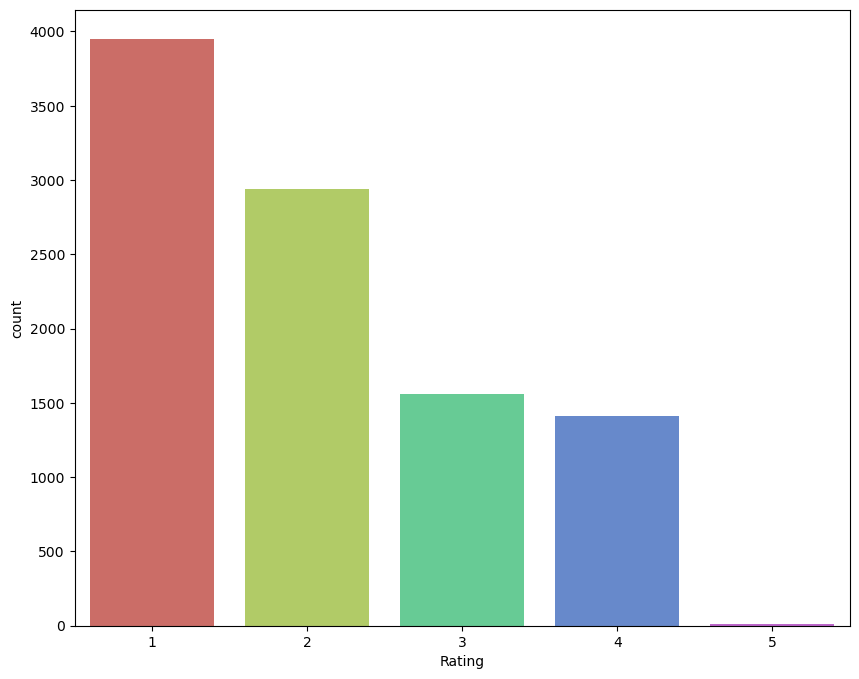

In [29]:
#Now plot the newly generated rating values and their frequencies.
sb.countplot(x='Rating',data=df, palette='hls')

In [30]:
#Question: How does this plot compare to plot of original data?

### 3 – Label encoding


In [31]:
#With this technique where each distinct value in a categorical variable is converted to a number.
#In this scenario you don’t get to pick the numeric value assigned to the value. It is system determined.

#let's check the data types again
df.dtypes

Name          object
Platform      object
Genre         object
Publisher     object
User_Score    object
Developer     object
Rating         int64
dtype: object

In [32]:
#Our categorical variables are of ‘object’ data type. 
#We need to convert to a category data type.
#In this example ‘Platform’ has a large-ish number of values and we want a quick way of 
# converting them we can illustrate this by creating a new variable.
df["Platform_Category"] = df["Platform"].astype('category')
df.dtypes

Name                   object
Platform               object
Genre                  object
Publisher              object
User_Score             object
Developer              object
Rating                  int64
Platform_Category    category
dtype: object

In [33]:
#Now convert this new variable to numeric.
df["Platform_Category"] = df["Platform_Category"].cat.codes
df.head(20)

,Name,Platform,Genre,Publisher,User_Score,Developer,Rating,Platform_Category
0,Wii Sports,Wii,Sports,Nintendo,8,Nintendo,1,12
2,Mario Kart Wii,Wii,Racing,Nintendo,8.3,Nintendo,1,12
3,Wii Sports Resort,Wii,Sports,Nintendo,8,Nintendo,1,12
6,New Super Mario Bros.,DS,Platform,Nintendo,8.5,Nintendo,1,2
7,Wii Play,Wii,Misc,Nintendo,6.6,Nintendo,1,12
8,New Super Mario Bros. Wii,Wii,Platform,Nintendo,8.4,Nintendo,1,12
11,Mario Kart DS,DS,Racing,Nintendo,8.6,Nintendo,1,2
13,Wii Fit,Wii,Sports,Nintendo,7.7,Nintendo,1,12
14,Kinect Adventures!,X360,Misc,Microsoft Game Studios,6.3,Good Science Studio,1,14
15,Wii Fit Plus,Wii,Sports,Nintendo,7.4,Nintendo,1,12


In [34]:
#The number assigned to the Platform_Category variable is based on the alphabetical 
#ordering of the values in the Platform variable. 
df.groupby("Platform")["Platform"].count()

Platform
3DS      226
DC        14
DS      1255
GBA      517
GC       469
PC       760
PS       201
PS2     1478
PS3      947
PS4      252
PSP      543
PSV      149
Wii      997
WiiU     105
X360    1041
XB       733
XOne     186
Name: Platform, dtype: int64

### 4-Using SciKit-Learn transform


In [35]:
#SciKit-Learn has a number of functions to help with data encodings. 
#The one we will look at in this example is the ‘fit_transform’ function.

#This will perform a similar task to what we have seen in a previous example
#Let's use the fit_tranforms function to encode the Genre variable

from sklearn.preprocessing import LabelEncoder

le_make = LabelEncoder()
df["Genre_Code"] = le_make.fit_transform(df["Genre"])
df[["Genre", "Genre_Code"]].head(10)

,Genre,Genre_Code
0,Sports,10
2,Racing,6
3,Sports,10
6,Platform,4
7,Misc,3
8,Platform,4
11,Racing,6
13,Sports,10
14,Misc,3
15,Sports,10


In [36]:
#And we can see this comparison when we look at the frequency counts.
df.groupby("Genre_Code")["Genre_Code"].count()

Genre_Code
0     2177
1      435
2      435
3      875
4      566
5      336
6      863
7      770
8     1017
9      564
10    1500
11     335
Name: Genre_Code, dtype: int64

In [37]:
df.head(10)


,Name,Platform,Genre,Publisher,User_Score,Developer,Rating,Platform_Category,Genre_Code
0,Wii Sports,Wii,Sports,Nintendo,8,Nintendo,1,12,10
2,Mario Kart Wii,Wii,Racing,Nintendo,8.3,Nintendo,1,12,6
3,Wii Sports Resort,Wii,Sports,Nintendo,8,Nintendo,1,12,10
6,New Super Mario Bros.,DS,Platform,Nintendo,8.5,Nintendo,1,2,4
7,Wii Play,Wii,Misc,Nintendo,6.6,Nintendo,1,12,3
8,New Super Mario Bros. Wii,Wii,Platform,Nintendo,8.4,Nintendo,1,12,4
11,Mario Kart DS,DS,Racing,Nintendo,8.6,Nintendo,1,2,6
13,Wii Fit,Wii,Sports,Nintendo,7.7,Nintendo,1,12,10
14,Kinect Adventures!,X360,Misc,Microsoft Game Studios,6.3,Good Science Studio,1,14,3
15,Wii Fit Plus,Wii,Sports,Nintendo,7.4,Nintendo,1,12,10


In [38]:
#And now we can drop the Genre variable from the dataframe as it is no longer needed.  
#BUT you will need to have recorded the mapping between the original Genre values and 
#the numeric values for future reference.
df = df.drop('Genre', axis=1)
df.head(10)

,Name,Platform,Publisher,User_Score,Developer,Rating,Platform_Category,Genre_Code
0,Wii Sports,Wii,Nintendo,8,Nintendo,1,12,10
2,Mario Kart Wii,Wii,Nintendo,8.3,Nintendo,1,12,6
3,Wii Sports Resort,Wii,Nintendo,8,Nintendo,1,12,10
6,New Super Mario Bros.,DS,Nintendo,8.5,Nintendo,1,2,4
7,Wii Play,Wii,Nintendo,6.6,Nintendo,1,12,3
8,New Super Mario Bros. Wii,Wii,Nintendo,8.4,Nintendo,1,12,4
11,Mario Kart DS,DS,Nintendo,8.6,Nintendo,1,2,6
13,Wii Fit,Wii,Nintendo,7.7,Nintendo,1,12,10
14,Kinect Adventures!,X360,Microsoft Game Studios,6.3,Good Science Studio,1,14,3
15,Wii Fit Plus,Wii,Nintendo,7.4,Nintendo,1,12,10
